In [1]:
# import the packages and libraries
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import scipy.stats as stats
import statsmodels.graphics.tsaplots as sgt
from sklearn import metrics
%matplotlib inline

In [2]:
# read data into a DataFrame
data = pd.read_csv('/Users/coralineduval/Documents/Ecole/M1-IMT:Singap/Semestre 1/IE5202/Project 2/P2train.csv')

In [3]:
#reading summary statistics of the data
print(data.shape)
data.head()
#Dropping any duplicates in the data to make it more accurate
data=data.drop_duplicates(subset='Time')

(40000, 9)


In [4]:
data.describe()

Temp        Rain1h        Snow1h     CloudsAll  TrafficVolume
count  33820.000000  33820.000000  33820.000000  33820.000000   33820.000000
mean     281.174334      0.369597      0.000141     45.113956    3288.870166
std       13.630746     53.465321      0.006217     38.654689    1988.771337
min        0.000000      0.000000      0.000000      0.000000       0.000000
25%      272.077500      0.000000      0.000000      1.000000    1242.000000
50%      282.440000      0.000000      0.000000     40.000000    3420.000000
75%      291.750000      0.000000      0.000000     90.000000    4959.000000
max      308.240000   9831.300000      0.510000    100.000000    7280.000000

In [5]:
data.head()

IsHoliday    Temp  Rain1h  Snow1h  CloudsAll WeatherMain WeatherDescription  \
0      None  288.28     0.0     0.0         40      Clouds   scattered clouds   
1      None  289.36     0.0     0.0         75      Clouds      broken clouds   
2      None  289.58     0.0     0.0         90      Clouds    overcast clouds   
3      None  290.13     0.0     0.0         90      Clouds    overcast clouds   
4      None  291.14     0.0     0.0         75      Clouds      broken clouds   

                  Time  TrafficVolume  
0  2012-10-02 09:00:00           5545  
1  2012-10-02 10:00:00           4516  
2  2012-10-02 11:00:00           4767  
3  2012-10-02 12:00:00           5026  
4  2012-10-02 13:00:00           4918

In [6]:
##Step 1: Regression on Time 

In [7]:
#as we only work on Time and TrafficVolume, we will create a new data set that only has these 2 variables
data1=data[["Time","TrafficVolume"]]

#to interpret the data, we will convert Time into a date format
data1["Time"]=pd.to_datetime(data1["Time"], format="%Y-%m-%d %H:%M:%S")
#setting Time as the index
data1.set_index("Time", inplace=True, drop=False)

#New column that indicates the day of the week corresponding to the time
data1["Weekday"]=data1["Time"].dt.day_name()

#creating new varibles for the year, month, day, hour to access information quicker:
data1["Year"]=data1["Time"].dt.year
data1["Month"]=data1["Time"].dt.month
data1["Day"]=data1["Time"].dt.day
data1["Hour"]=data1["Time"].dt.hour

data1.head()

/Users/coralineduval/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/Users/coralineduval/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/Users/coralineduval/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usin

Time  TrafficVolume  Weekday  Year  Month  \
Time                                                                           
2012-10-02 09:00:00 2012-10-02 09:00:00           5545  Tuesday  2012     10   
2012-10-02 10:00:00 2012-10-02 10:00:00           4516  Tuesday  2012     10   
2012-10-02 11:00:00 2012-10-02 11:00:00           4767  Tuesday  2012     10   
2012-10-02 12:00:00 2012-10-02 12:00:00           5026  Tuesday  2012     10   
2012-10-02 13:00:00 2012-10-02 13:00:00           4918  Tuesday  2012     10   

                     Day  Hour  
Time                            
2012-10-02 09:00:00    2     9  
2012-10-02 10:00:00    2    10  
2012-10-02 11:00:00    2    11  
2012-10-02 12:00:00    2    12  
2012-10-02 13:00:00    2    13

/Users/coralineduval/opt/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


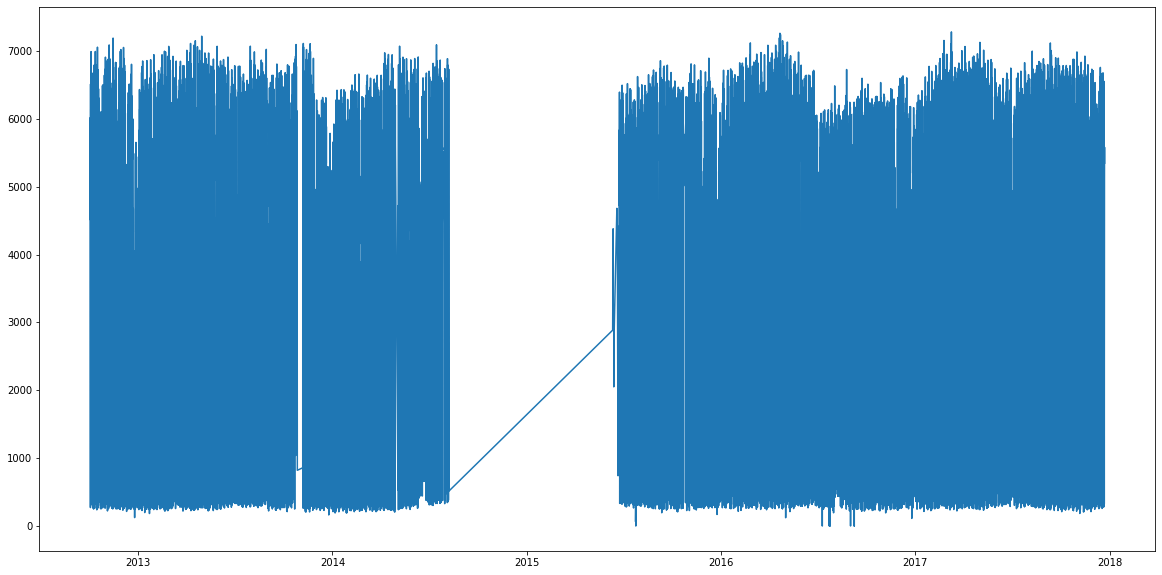

In [8]:
#Plotting the whole data
plt.figure(figsize=(20,10))
plt.plot(data1["Time"],data1["TrafficVolume"])
#we notice that there are no data for 2015

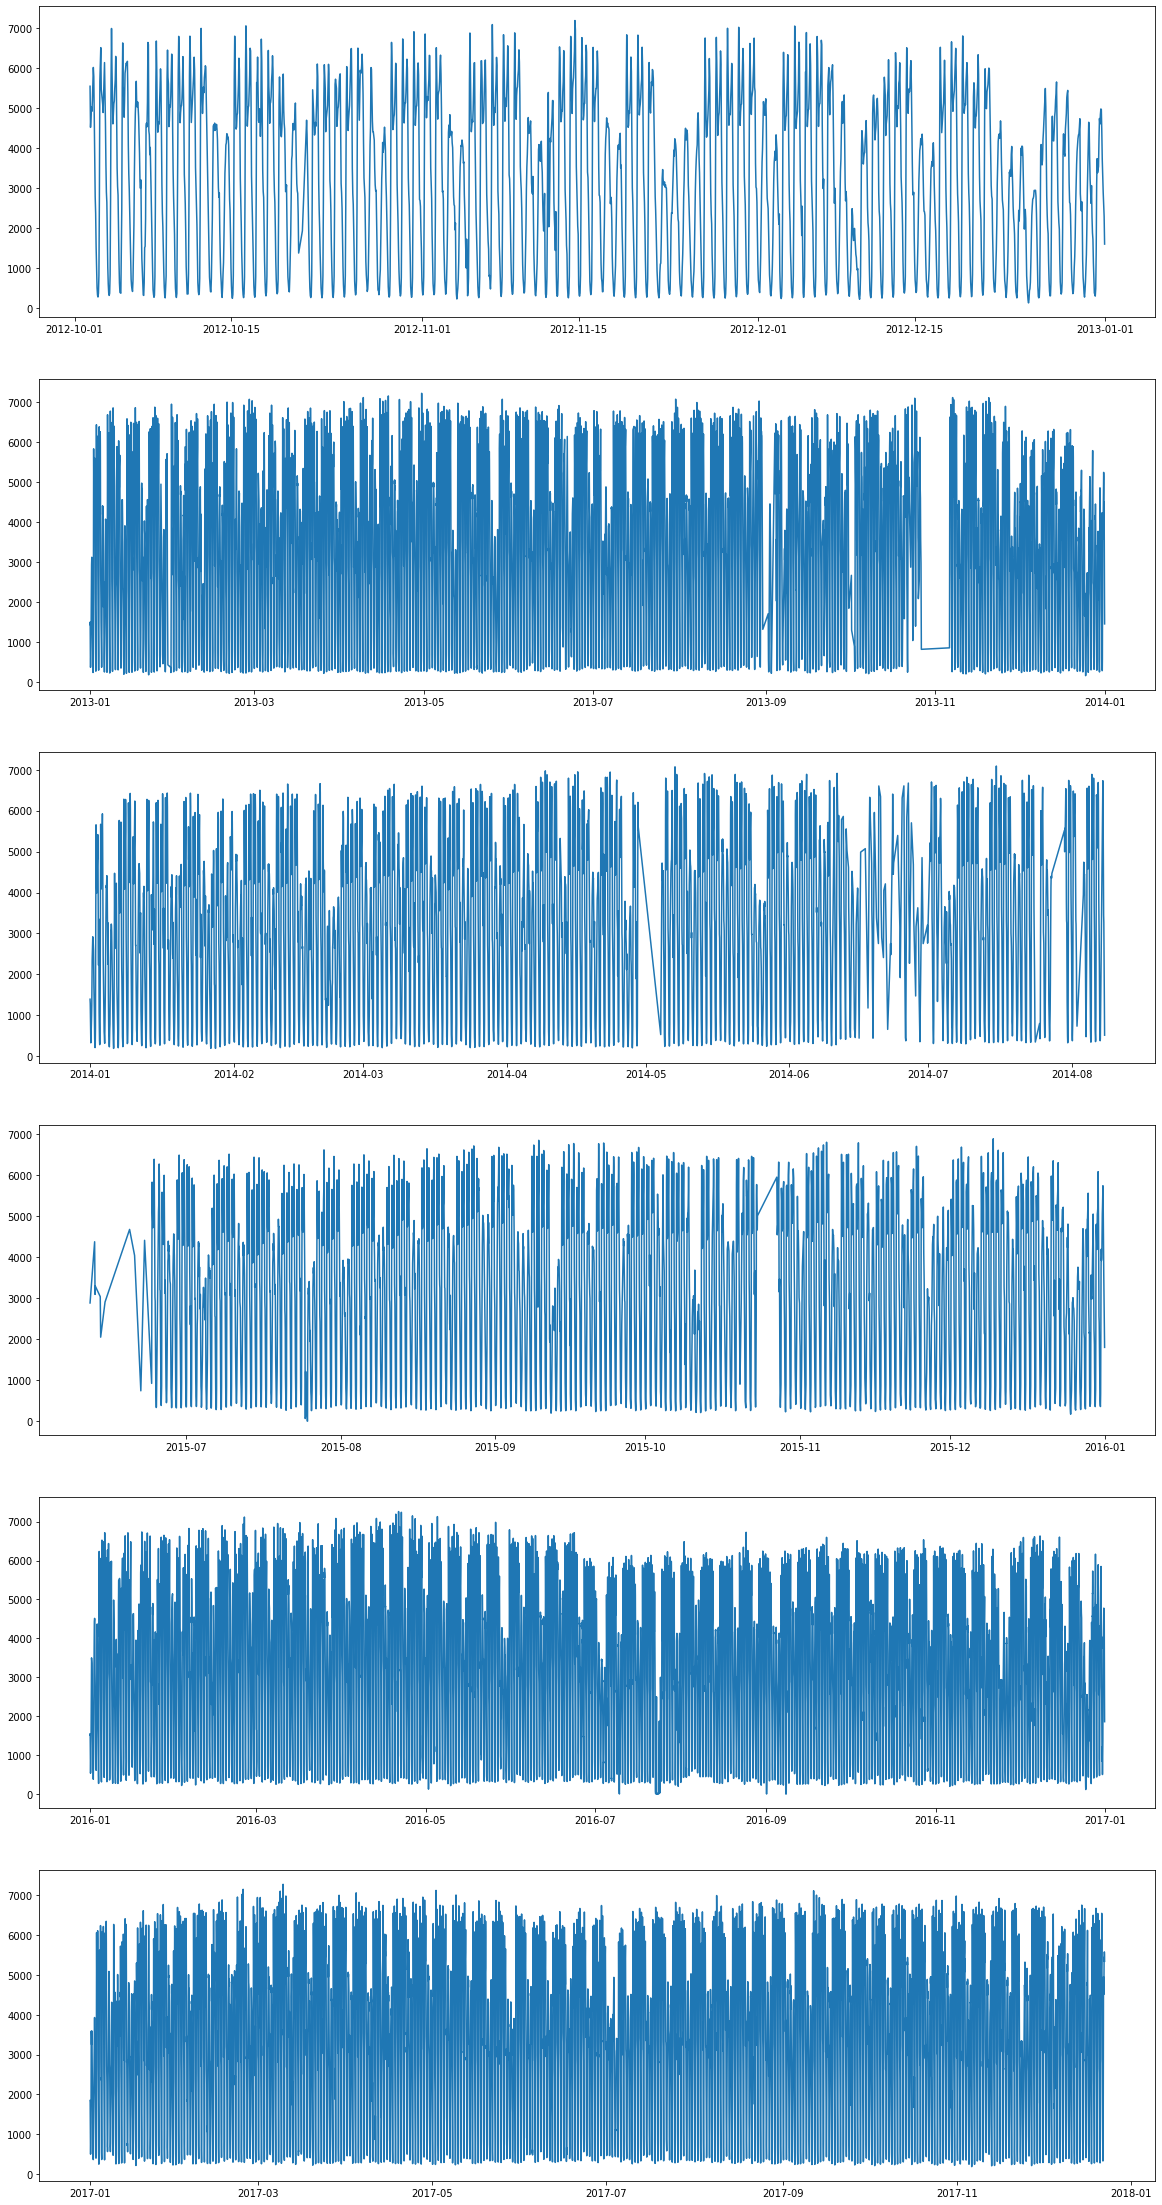

In [9]:
#plotting the data according to each year to see clearer patterns
fig=plt.figure(figsize=(20,40))
for i in range(2012,2018):
    ax = fig.add_subplot(6,1,i-2011)
    ax.plot(data1[data1["Year"]==i]["Time"],data1[data1["Year"]==i]["TrafficVolume"])


In [10]:
#as they is a big gap for 2015, we will cut the dataset in 2 to fit the model, so that 2015's gap doesn't 
#influence the result too much.
subdata1=data1[:"2014-08-08 00:00:00"]
subdata2=data1["2015-06-24 00:00:00":]
# set up the linear regression on time using dummy variables
lmfit1 = smf.ols('TrafficVolume~C(Weekday)*C(Hour)+C(Day)*C(Month)', data = subdata1).fit()
lmfit1.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          TrafficVolume   R-squared:                       0.956
Model:                            OLS   Adj. R-squared:                  0.954
Method:                 Least Squares   F-statistic:                     547.2
Date:                Sun, 17 Nov 2019   Prob (F-statistic):               0.00
Time:                        22:51:46   Log-Likelihood:            -1.0374e+05
No. Observations:               13897   AIC:                         2.085e+05
Df Residuals:                   13365   BIC:                         2.126e+05
Df Model:                         531                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
Intercept                             -1344.6410     81.942    -16.410      0.000   -1505.260   -1184.022
C(Weekday)[T.Monday]                    -18.2197     70.562     -0.258      0.796    -156.532     120.092
C(Weekday)[T.Saturday]                  479.4707     67.876      7.064      0.000     346.424     612.518
C(Weekday)[T.Sunday]                    611.5297     70.225      8.708      0.000     473.878     749.182
C(Weekday)[T.Thursday]                  -56.5856     69.041     -0.820      0.412    -191.915      78.744
C(Weekday)[T.Tuesday]                   -34.5408     71.223     -0.485      0.628    -174.147     105.066
C(Weekday)[T.Wednesday]                 -18.7636     69.897     -0.268      0.788    -155.772     118.244
C(Hour)[T.1]                           -276.9690     66.155     -4.187      0.000    -406.642    -147.296
C(Hour)[T.2]                           -381.6984     65.749     -5.805      0.000    -510.576    -252.820
C(Hour)[T.3]                           -334.2727     65.970     -5.067      0.000    -463.584    -204.962
C(Hour)[T.4]                             51.3250     66.570      0.771      0.441     -79.161     181.811
C(Hour)[T.5]                           1757.2627     66.379     26.473      0.000    1627.150    1887.376
C(Hour)[T.6]                           4471.1039     66.775     66.958      0.000    4340.216    4601.992
C(Hour)[T.7]                           5339.1633     66.008     80.887      0.000    5209.779    5468.548
C(Hour)[T.8]                           4746.5450     66.179     71.722      0.000    4616.824    4876.266
C(Hour)[T.9]                           4190.7326     66.797     62.739      0.000    4059.801    4321.664
C(Hour)[T.10]                          3880.1839     65.989     58.800      0.000    3750.835    4009.532
C(Hour)[T.11]                          4304.1511     65.964     65.250      0.000    4174.852    4433.451
C(Hour)[T.12]                          4612.1137     67.912     67.913      0.000    4478.996    4745.232
C(Hour)[T.13]                          4637.0791     66.793     69.425      0.000    4506.156    4768.002
C(Hour)[T.14]                          4899.1816     65.976     74.257      0.000    4769.860    5028.503
C(Hour)[T.15]                          5169.2247     66.380     77.873      0.000    5039.110    5299.339
C(Hour)[T.16]                          5417.4817     66.181     81.858      0.000    5287.757    5547.207
C(Hour)[T.17]                          4928.7070     65.598     75.135      0.000    4800.125    5057.289
C(Hour)[T.18]                          4030.5476     66.205     60.880      0.000    3900.776    4160.319
C(Hour)[T.19]                          2928.9643     65.434     44.762      0.000    2800.704    3057.225
C(Hour)[T

In [11]:
#for the secondsubdata (after 2015)
lmfit2 = smf.ols('TrafficVolume~C(Weekday)*C(Hour)+C(Day)*C(Month)', data = subdata2).fit()
lmfit2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          TrafficVolume   R-squared:                       0.954
Model:                            OLS   Adj. R-squared:                  0.953
Method:                 Least Squares   F-statistic:                     753.9
Date:                Sun, 17 Nov 2019   Prob (F-statistic):               0.00
Time:                        22:51:51   Log-Likelihood:            -1.4867e+05
No. Observations:               19911   AIC:                         2.984e+05
Df Residuals:                   19378   BIC:                         3.026e+05
Df Model:                         532                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
Intercept                              -187.5885     76.328     -2.458      0.014    -337.197     -37.980
C(Weekday)[T.Monday]                   -113.3043     54.839     -2.066      0.039    -220.793      -5.815
C(Weekday)[T.Saturday]                  533.1366     54.947      9.703      0.000     425.435     640.838
C(Weekday)[T.Sunday]                    708.4754     55.166     12.843      0.000     600.345     816.606
C(Weekday)[T.Thursday]                 -114.3031     54.723     -2.089      0.037    -221.565      -7.041
C(Weekday)[T.Tuesday]                  -128.7530     54.820     -2.349      0.019    -236.204     -21.302
C(Weekday)[T.Wednesday]                -153.4521     54.719     -2.804      0.005    -260.706     -46.198
C(Hour)[T.1]                           -317.0015     54.500     -5.817      0.000    -423.826    -210.177
C(Hour)[T.2]                           -442.1867     54.850     -8.062      0.000    -549.698    -334.675
C(Hour)[T.3]                           -406.5536     54.389     -7.475      0.000    -513.160    -299.947
C(Hour)[T.4]                             37.5855     54.729      0.687      0.492     -69.687     144.858
C(Hour)[T.5]                           1780.0695     54.734     32.522      0.000    1672.785    1887.354
C(Hour)[T.6]                           4384.2323     54.600     80.297      0.000    4277.211    4491.254
C(Hour)[T.7]                           5174.0885     54.854     94.324      0.000    5066.569    5281.608
C(Hour)[T.8]                           4486.3390     55.215     81.252      0.000    4378.112    4594.566
C(Hour)[T.9]                           3980.0590     54.979     72.392      0.000    3872.295    4087.823
C(Hour)[T.10]                          3764.8234     54.724     68.797      0.000    3657.560    3872.087
C(Hour)[T.11]                          4118.7101     54.861     75.076      0.000    4011.178    4226.242
C(Hour)[T.12]                          4364.9802     54.159     80.596      0.000    4258.824    4471.136
C(Hour)[T.13]                          4297.0143     54.854     78.336      0.000    4189.496    4404.533
C(Hour)[T.14]                          4534.2566     54.963     82.496      0.000    4426.524    4641.990
C(Hour)[T.15]                          4883.4546     55.482     88.019      0.000    4774.705    4992.204
C(Hour)[T.16]                          5204.8454     54.843     94.905      0.000    5097.349    5312.342
C(Hour)[T.17]                          4690.0925     55.225     84.928      0.000    4581.848    4798.337
C(Hour)[T.18]                          3816.5661     55.471     68.804      0.000    3707.839    3925.293
C(Hour)[T.19]                          2852.5668     55.099     51.772      0.000    2744.568    2960.566
C(Hour)[T

In [12]:
#we are checking if it still compute correct results with the full model
modelfull = smf.ols('TrafficVolume~C(Weekday)*C(Hour)+C(Day)*C(Month)', data = data1).fit()
modelfull.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          TrafficVolume   R-squared:                       0.949
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     1169.
Date:                Sun, 17 Nov 2019   Prob (F-statistic):               0.00
Time:                        22:51:58   Log-Likelihood:            -2.5448e+05
No. Observations:               33820   AIC:                         5.100e+05
Df Residuals:                   33287   BIC:                         5.145e+05
Df Model:                         532                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
Intercept                              -697.4139     57.289    -12.174      0.000    -809.702    -585.126
C(Weekday)[T.Monday]                   -142.2998     44.222     -3.218      0.001    -228.977     -55.623
C(Weekday)[T.Saturday]                  485.0368     44.415     10.920      0.000     397.981     572.093
C(Weekday)[T.Sunday]                    622.4322     44.669     13.934      0.000     534.879     709.985
C(Weekday)[T.Thursday]                 -107.5335     44.645     -2.409      0.016    -195.038     -20.029
C(Weekday)[T.Tuesday]                  -165.0060     44.429     -3.714      0.000    -252.089     -77.923
C(Weekday)[T.Wednesday]                -144.5890     44.327     -3.262      0.001    -231.471     -57.707
C(Hour)[T.1]                           -304.0428     44.164     -6.884      0.000    -390.606    -217.480
C(Hour)[T.2]                           -424.5062     44.271     -9.589      0.000    -511.280    -337.733
C(Hour)[T.3]                           -380.6828     44.113     -8.630      0.000    -467.145    -294.220
C(Hour)[T.4]                             34.3326     44.438      0.773      0.440     -52.768     121.434
C(Hour)[T.5]                           1764.4548     44.385     39.753      0.000    1677.458    1851.452
C(Hour)[T.6]                           4415.9615     44.435     99.380      0.000    4328.867    4503.056
C(Hour)[T.7]                           5239.6642     44.332    118.190      0.000    5152.771    5326.557
C(Hour)[T.8]                           4594.0137     44.554    103.112      0.000    4506.687    4681.341
C(Hour)[T.9]                           4060.5020     44.615     91.011      0.000    3973.054    4147.950
C(Hour)[T.10]                          3806.0029     44.274     85.965      0.000    3719.225    3892.781
C(Hour)[T.11]                          4187.8972     44.331     94.469      0.000    4101.007    4274.787
C(Hour)[T.12]                          4455.6769     44.497    100.134      0.000    4368.461    4542.893
C(Hour)[T.13]                          4428.6318     44.555     99.397      0.000    4341.303    4515.961
C(Hour)[T.14]                          4680.6766     44.382    105.463      0.000    4593.686    4767.667
C(Hour)[T.15]                          4995.9344     44.729    111.692      0.000    4908.263    5083.606
C(Hour)[T.16]                          5284.9429     44.383    119.075      0.000    5197.950    5371.936
C(Hour)[T.17]                          4784.7881     44.386    107.799      0.000    4697.790    4871.786
C(Hour)[T.18]                          3898.4718     44.559     87.491      0.000    3811.135    3985.809
C(Hour)[T.19]                          2876.1693     44.277     64.958      0.000    2789.384    2962.955
C(Hour)[T

In [13]:
def transform_exog_to_model(fit, exog):
    transform=True
    self=fit

    # The following is lifted straight from statsmodels.base.model.Results.predict()
    if transform and hasattr(self.model, 'formula') and exog is not None:
        from patsy import dmatrix
        exog = dmatrix(self.model.data.orig_exog.design_info.builder,
                       exog)

    if exog is not None:
        exog = np.asarray(exog)
        if exog.ndim == 1 and (self.model.exog.ndim == 1 or
                               self.model.exog.shape[1] == 1):
            exog = exog[:, None]
        exog = np.atleast_2d(exog)  # needed in count model shape[1]

    # end lifted code
    return exog

/Users/coralineduval/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: DeprecationWarning: The DesignInfo.builder attribute is deprecated starting in patsy v0.4.0; distinct builder objects have been eliminated and design_info.builder is now just a long-winded way of writing 'design_info' (i.e. the .builder attribute just returns self)
  


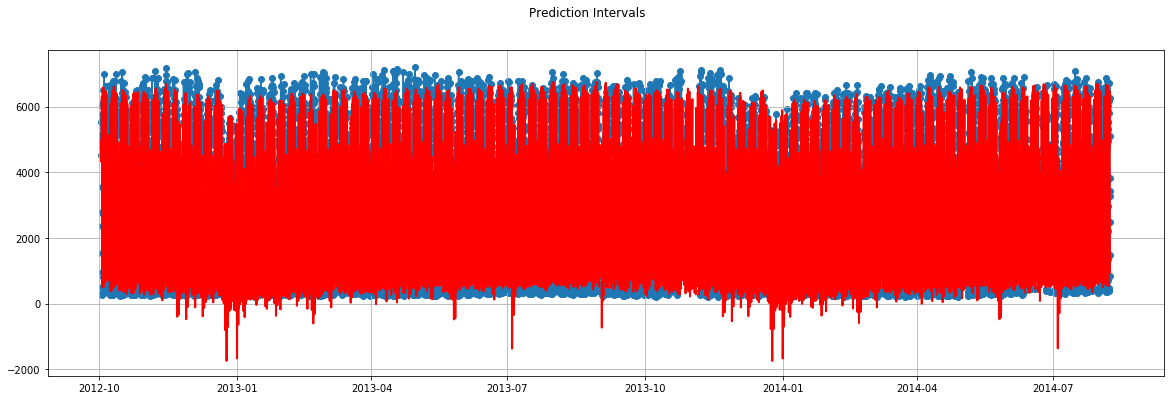

In [14]:
#we will now plot the results for each subdataset and the full model
x_pred = pd.date_range("2012-10-02 09:00:00","2014-08-08 00:00:00",freq="H")
newdf = pd.DataFrame({'Time': x_pred})

newdf["Weekday"]=newdf["Time"].dt.day_name()
newdf["Year"]=newdf["Time"].dt.year
newdf["Month"]=newdf["Time"].dt.month
newdf["Day"]=newdf["Time"].dt.day
newdf["Hour"]=newdf["Time"].dt.hour

from statsmodels.sandbox.regression.predstd import wls_prediction_std
y_pred = lmfit1.predict(newdf);
transformed_exog = transform_exog_to_model(lmfit1, newdf)
prstd, iv_l, iv_u = wls_prediction_std(lmfit1, transformed_exog, weights=[1])

fig, ax = plt.subplots(figsize=(20, 6))
ax.plot(subdata1['Time'], subdata1['TrafficVolume'])
ax.scatter(subdata1['Time'], subdata1['TrafficVolume'])
fig.suptitle('Prediction Intervals')
ax.grid(True)
ax.plot(list(x_pred), y_pred, '-', color='red', linewidth=2)
ax.axis('tight')
plt.show()

/Users/coralineduval/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: DeprecationWarning: The DesignInfo.builder attribute is deprecated starting in patsy v0.4.0; distinct builder objects have been eliminated and design_info.builder is now just a long-winded way of writing 'design_info' (i.e. the .builder attribute just returns self)
  


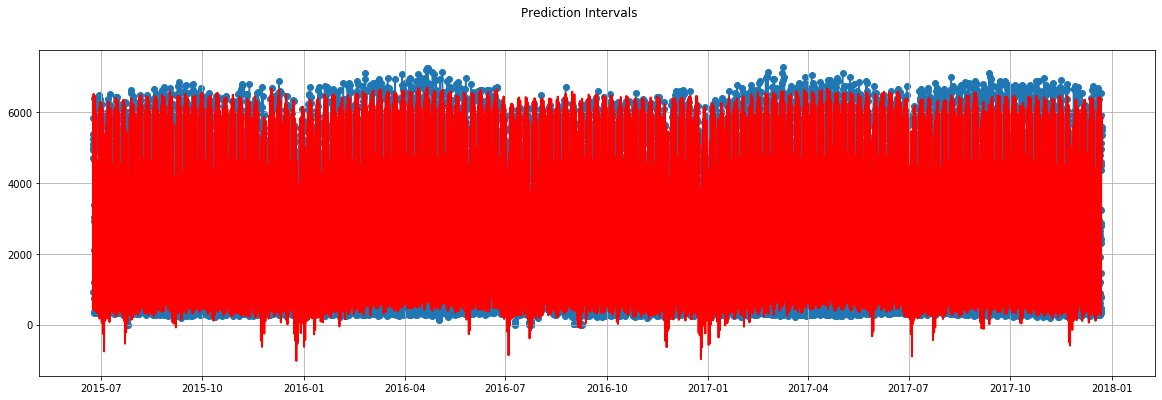

In [15]:
#for subdata2:
x_pred = pd.date_range("2015-06-24 00:00:00","2017-12-22 16:00:00",freq="H")
newdf = pd.DataFrame({'Time': x_pred})

newdf["Weekday"]=newdf["Time"].dt.day_name()
newdf["Year"]=newdf["Time"].dt.year
newdf["Month"]=newdf["Time"].dt.month
newdf["Day"]=newdf["Time"].dt.day
newdf["Hour"]=newdf["Time"].dt.hour

y_pred = lmfit2.predict(newdf);
transformed_exog = transform_exog_to_model(lmfit2, newdf)
prstd, iv_l, iv_u = wls_prediction_std(lmfit2, transformed_exog, weights=[1])

fig, ax = plt.subplots(figsize=(20, 6))
ax.plot(subdata2['Time'], subdata2['TrafficVolume'])
ax.scatter(subdata2['Time'], subdata2['TrafficVolume'])
fig.suptitle('Prediction Intervals')
ax.grid(True)
ax.plot(list(x_pred), y_pred, '-', color='red', linewidth=2)
ax.axis('tight')
plt.show()

/Users/coralineduval/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: DeprecationWarning: The DesignInfo.builder attribute is deprecated starting in patsy v0.4.0; distinct builder objects have been eliminated and design_info.builder is now just a long-winded way of writing 'design_info' (i.e. the .builder attribute just returns self)
  


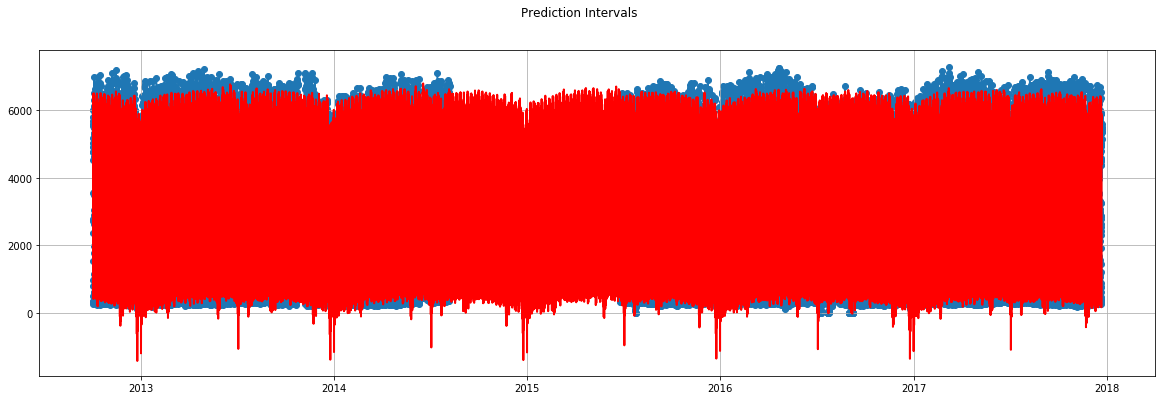

In [16]:
#for the whole data:
x_pred = pd.date_range("2012-10-02 09:00:00","2017-12-22 16:00:00",freq="H")
newdf = pd.DataFrame({'Time': x_pred})

newdf["Weekday"]=newdf["Time"].dt.day_name()
newdf["Year"]=newdf["Time"].dt.year
newdf["Month"]=newdf["Time"].dt.month
newdf["Day"]=newdf["Time"].dt.day
newdf["Hour"]=newdf["Time"].dt.hour

y_pred = modelfull.predict(newdf);
transformed_exog = transform_exog_to_model(modelfull, newdf)
prstd, iv_l, iv_u = wls_prediction_std(modelfull, transformed_exog, weights=[1])

fig, ax = plt.subplots(figsize=(20, 6))
ax.plot(data1['Time'], data1['TrafficVolume'])
ax.scatter(data1['Time'], data1['TrafficVolume'])
fig.suptitle('Prediction Intervals')
ax.grid(True)
ax.plot(list(x_pred), y_pred, '-', color='red', linewidth=2)
ax.axis('tight')
plt.show()

In [17]:
#looking at the rmse of the model
y_pred= modelfull.predict(data1)
print(np.sqrt(metrics.mean_squared_error(data1["TrafficVolume"].values, y_pred)))

448.30067986767096


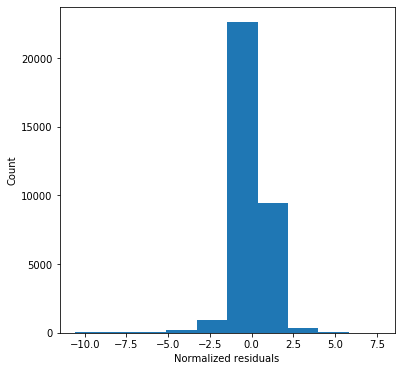

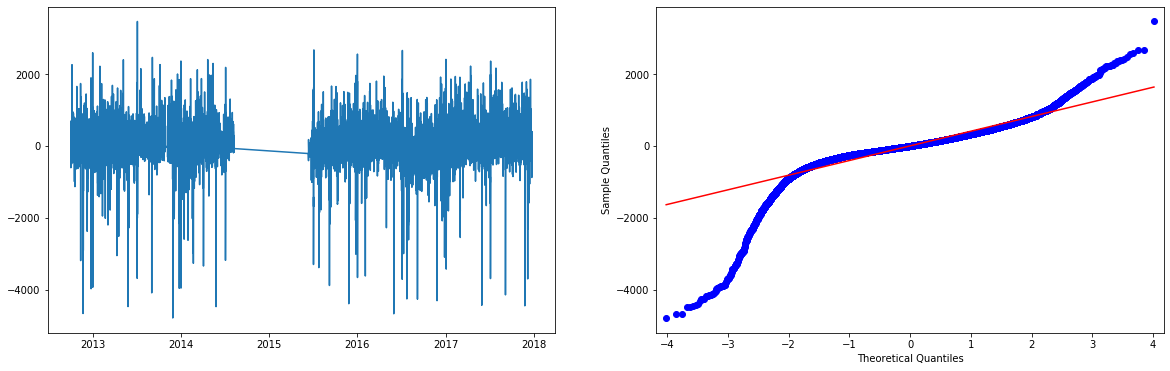

In [18]:
import scipy.stats as stats
res = modelfull.resid

f1 = plt.figure(figsize=(6,6))
f1 = plt.hist(modelfull.resid_pearson)
f1 = plt.ylabel('Count')
f1 = plt.xlabel('Normalized residuals') 

fig, ax = plt.subplots(1,2,figsize=(20,6))
ax[0].plot(res)
fig = sm.qqplot(res, stats.distributions.norm, line='r', ax=ax[1])

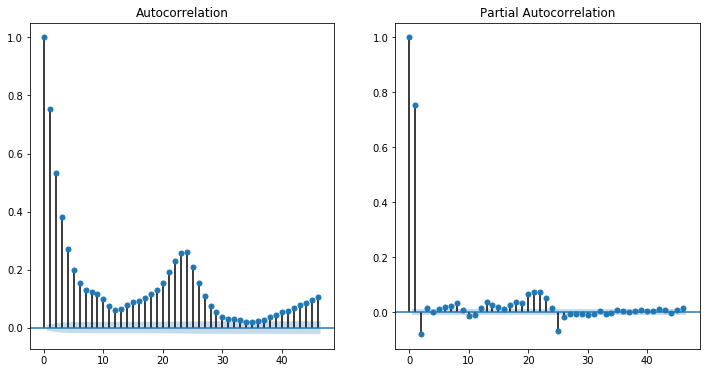

In [19]:
fig, ax = plt.subplots(1,2,figsize=(12,6))
fig = sgt.plot_acf(res, ax=ax[0], unbiased=True)
fig = sgt.plot_pacf(res, ax=ax[1], method='ols')

In [20]:
##Step 2 : Exponential Smoothing 
#In this task, I can apply appropriate exponential smoothing to make forecasting. 

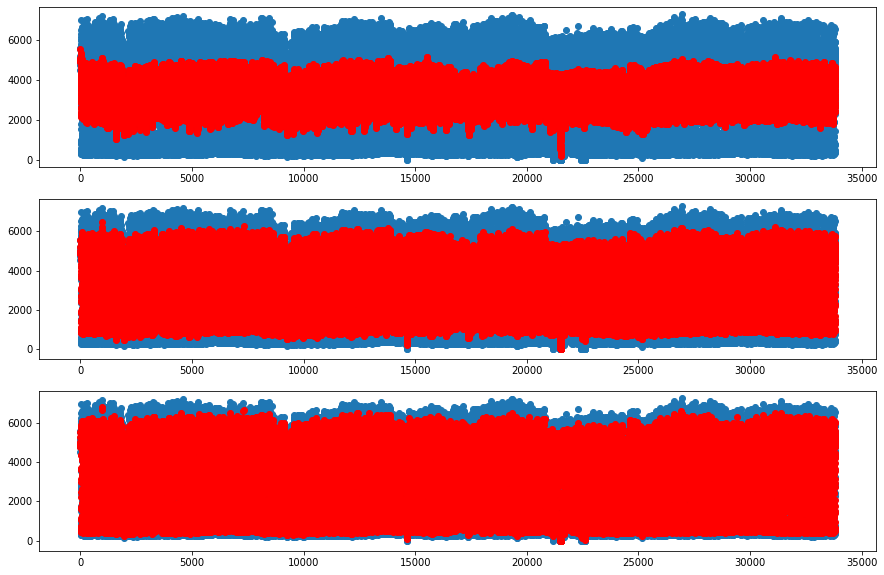

In [21]:
#trying different exponential smoothing for 3 values of alpha

fig, ax = plt.subplots(3,1,figsize=(15,10))
al = 0.1
ewma = data['TrafficVolume'].ewm(alpha=al)
ax[0].scatter(x=range(0,data.shape[0]), y=data['TrafficVolume'])
ax[0].scatter(x=range(0,data.shape[0]), y=ewma.mean(), color='red')

al = 0.3
ewma = data['TrafficVolume'].ewm(alpha=al)
ax[1].scatter(x=range(0,data.shape[0]), y=data['TrafficVolume'])
ax[1].scatter(x=range(0,data.shape[0]), y=ewma.mean(), color='red')

al = 0.5
ewma = data['TrafficVolume'].ewm(alpha=al)
ax[2].scatter(x=range(0,data.shape[0]), y=data['TrafficVolume'])
ax[2].scatter(x=range(0,data.shape[0]), y=ewma.mean(), color='red')

1.0


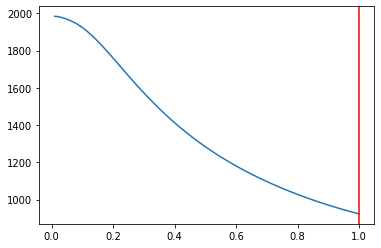

In [22]:
#we will see which alpha is the best for this dataset

alpha = np.linspace(0.01,1,num=100)
err = []
for al in alpha:
    ewma = data['TrafficVolume'].ewm(alpha=al)
    pred = ewma.mean()
    diff = data['TrafficVolume'] - pred.shift(1)
    err.append(np.sqrt((diff ** 2).mean()))
    
plt.plot(alpha, err)
optal = alpha[np.argmin(err)]
plt.axvline(x=optal, color='red')
print(optal)

In [23]:
#as it does not seem to be very efficient, we will try the moving average 

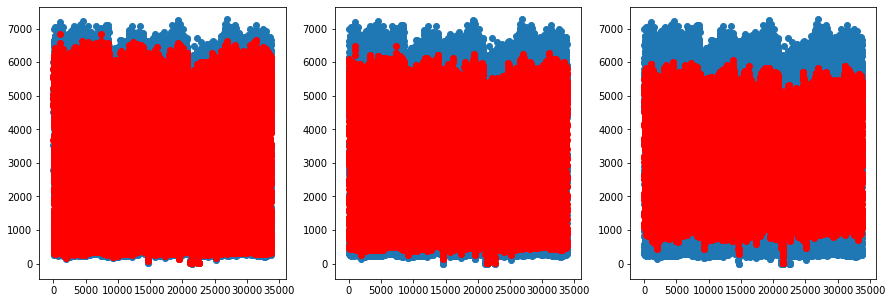

In [24]:
fig, ax = plt.subplots(1,3,figsize=(15,5))
win = 3
ma = data['TrafficVolume'].rolling(window=win, min_periods=None, center=False)
ax[0].scatter(x=range(0,data.shape[0]), y=data['TrafficVolume'])
ax[0].scatter(x=range(0,data.shape[0]), y=ma.mean(), color='red')

win = 5
ma = data['TrafficVolume'].rolling(window=win, min_periods=None, center=False)
ax[1].scatter(x=range(0,data.shape[0]), y=data['TrafficVolume'])
ax[1].scatter(x=range(0,data.shape[0]), y=ma.mean(), color='red')

win = 9
ma = data['TrafficVolume'].rolling(window=win, min_periods=None, center=False)
ax[2].scatter(x=range(0,data.shape[0]), y=data['TrafficVolume'])
ax[2].scatter(x=range(0,data.shape[0]), y=ma.mean(), color='red')

3 1901.2927445497144


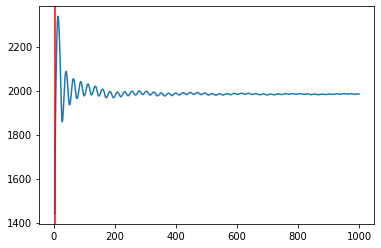

In [25]:
#we will see which w is the best for this dataset

win = [s for s in range(3,1000,1)]
err = [];
for w in win:
    ma = data['TrafficVolume'].rolling(window=w, min_periods=None, center=False)
    pred = ma.mean();
    diff = data['TrafficVolume'] - pred.shift(1);
    err.append(np.sqrt((diff ** 2).mean()))
    
plt.plot(win, err)
optw = win[np.argmin(err)]
plt.axvline(x=optw, color='red')
print(optw,err[optw])

#it seems the error is minimized for small values of observations used

/Users/coralineduval/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/Users/coralineduval/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/coralineduval/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:712: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


1601.6366647609598


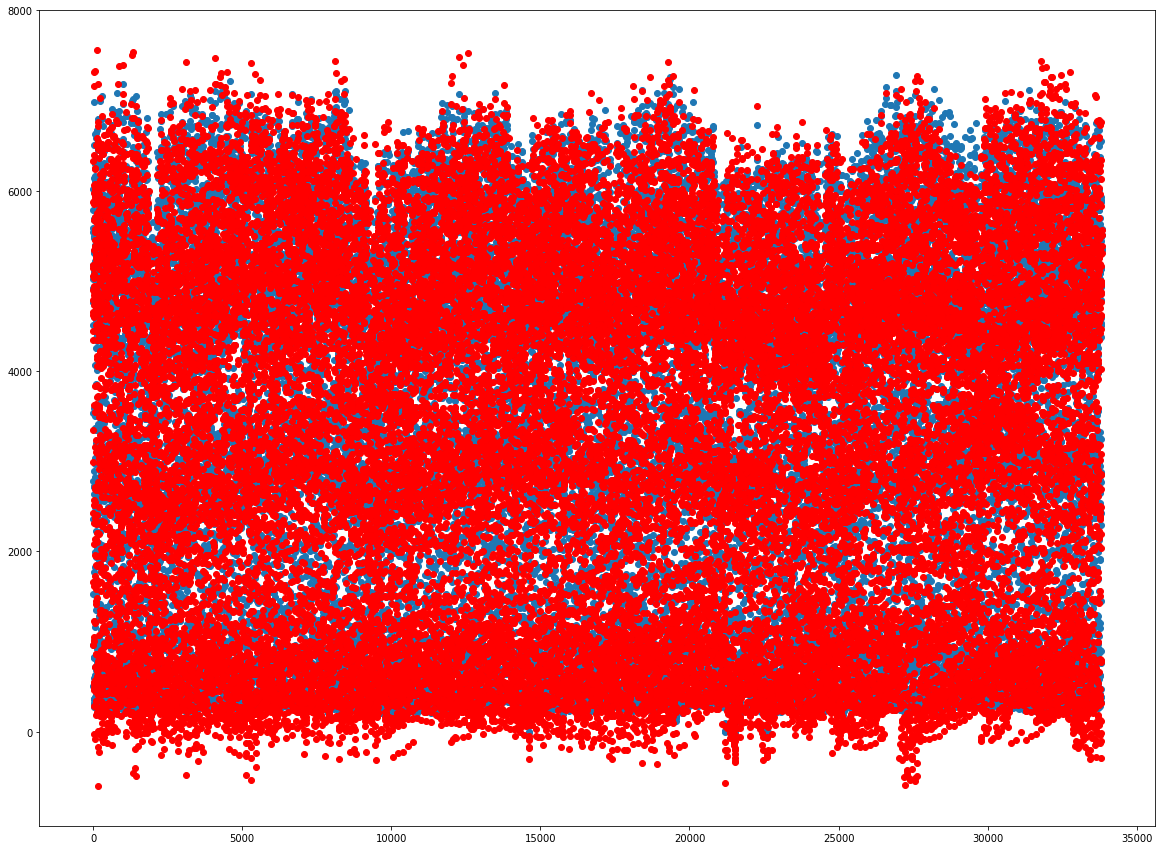

In [26]:
#as we only work on Time and TrafficVolume, we will create a new data set that only has these 2 variables
data2=data[["Time","TrafficVolume"]]

#to interpret the data, we will convert Time into a date format
data2["Time"]=pd.to_datetime(data2["Time"], format="%Y-%m-%d %H:%M:%S")
#setting Time as the index
data2.set_index("Time", inplace=True, drop=True)

from statsmodels.tsa.holtwinters import ExponentialSmoothing

#trying to do Holt's Winter method for a period of a week
model = ExponentialSmoothing(data2, trend=None, seasonal="add",seasonal_periods=168)
model_fit = model.fit()
yhat = model_fit.predict(start="2012-10-02 09:00:00",end="2017-12-22 16:00:00")


diff = data2['TrafficVolume'] - yhat.shift(1);
err=np.sqrt((diff ** 2).mean())
print(err)

f1 = plt.figure(figsize=(20,15))
plt.scatter(x=range(0,data2.shape[0]), y=data2['TrafficVolume'])
plt.scatter(x=range(0,data2.shape[0]), y=yhat, color='red')

/Users/coralineduval/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/coralineduval/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:712: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


1529.1706285635646


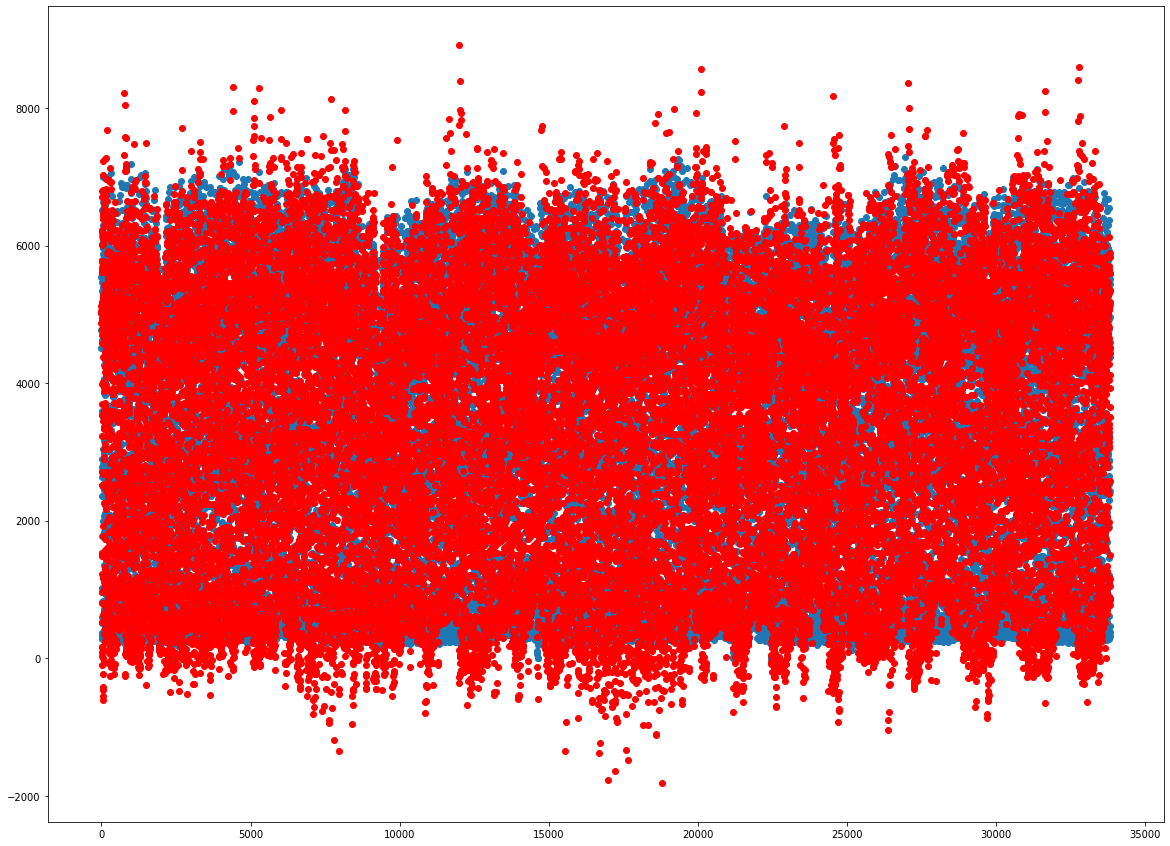

In [27]:
#trying to do Holt's Winter method for a period of a day
model2 = ExponentialSmoothing(data2, trend=None, seasonal="add",seasonal_periods=24)
model2_fit = model2.fit()
yhat2 = model2_fit.predict(start="2012-10-02 09:00:00",end="2017-12-22 16:00:00")

diff2 = data2['TrafficVolume'] - yhat2.shift(1)
err2=np.sqrt((diff2 ** 2).mean())
print(err2)

f1 = plt.figure(figsize=(20,15))
plt.scatter(x=range(0,data2.shape[0]), y=data2['TrafficVolume'])
plt.scatter(x=range(0,data2.shape[0]), y=yhat2, color='red')

In [28]:
##Step 3 Free form forecasting 

In [29]:
#In this task, you can select or build your own model to predict the traffic volumes. 
#You can only use methods discussed in the module (regression, exponential smoothing, Box-Jenkens methodologies,
#etc). Elaborate your choice and potential room for improvement. 
#For this task, you need to submit your forecasting results for accuracy evaluation. 

In [30]:
#We will here work on the full dataset
#to interpret the data, we will convert Time into a date format
data["Time"]=pd.to_datetime(data["Time"], format="%Y-%m-%d %H:%M:%S")
#setting Time as the index
data.set_index("Time", inplace=True, drop=False)

#New column that indicates the day of the week corresponding to the time
data["Weekday"]=data["Time"].dt.day_name()

#creating new varibles for the year, month, day, hour to access information quicker:
data["Year"]=data["Time"].dt.year
data["Month"]=data["Time"].dt.month
data["Day"]=data["Time"].dt.day
data["Hour"]=data["Time"].dt.hour

data.head()

IsHoliday    Temp  Rain1h  Snow1h  CloudsAll WeatherMain  \
Time                                                                           
2012-10-02 09:00:00      None  288.28     0.0     0.0         40      Clouds   
2012-10-02 10:00:00      None  289.36     0.0     0.0         75      Clouds   
2012-10-02 11:00:00      None  289.58     0.0     0.0         90      Clouds   
2012-10-02 12:00:00      None  290.13     0.0     0.0         90      Clouds   
2012-10-02 13:00:00      None  291.14     0.0     0.0         75      Clouds   

                    WeatherDescription                Time  TrafficVolume  \
Time                                                                        
2012-10-02 09:00:00   scattered clouds 2012-10-02 09:00:00           5545   
2012-10-02 10:00:00      broken clouds 2012-10-02 10:00:00           4516   
2012-10-02 11:00:00    overcast clouds 2012-10-02 11:00:00           4767   
2012-10-02 12:00:00    overcast clouds 2012-10-02 12:00:00           5026   
2012-10-02 13:00:00      broken clouds 2012-10-02 13:00:00           4918   

                     Weekday  Year  Month  Day  Hour  
Time                                                  
2012-10-02 09:00:00  Tuesday  2012     10    2     9  
2012-10-02 10:00:00  Tuesday  2012     10    2    10  
2012-10-02 11:00:00  Tuesday  2012     10    2    11  
2012-10-02 12:00:00  Tuesday  2012     10    2    12  
2012-10-02 13:00:00  Tuesday  2012     10    2    13

In [31]:
#we will look at the missing data, or data that is null

In [32]:
data.IsHoliday.value_counts()
#everything seems good for this column

None                         33775
Thanksgiving Day                 5
Columbus Day                     5
Veterans Day                     5
Labor Day                        4
New Years Day                    4
Christmas Day                    4
Memorial Day                     4
State Fair                       4
Washingtons Birthday             4
Independence Day                 4
Martin Luther King Jr Day        2
Name: IsHoliday, dtype: int64

In [33]:
#looking for the temperature under 230K(-43,15C°)
print(data[data['Temp'] < 230 ])
i=0
#for every data under 230K, we will replace its temperature by the temperature of the previous hour
for i in range(data.shape[0]):
    if data.iloc[i,1]<230:
        data.iloc[i,1]=data.iloc[i-1,1]

                    IsHoliday  Temp  Rain1h  Snow1h  CloudsAll WeatherMain  \
Time                                                                         
2014-01-31 03:00:00      None   0.0     0.0     0.0          0       Clear   
2014-01-31 04:00:00      None   0.0     0.0     0.0          0       Clear   
2014-01-31 05:00:00      None   0.0     0.0     0.0          0       Clear   
2014-01-31 06:00:00      None   0.0     0.0     0.0          0       Clear   
2014-02-02 03:00:00      None   0.0     0.0     0.0          0       Clear   
2014-02-02 04:00:00      None   0.0     0.0     0.0          0       Clear   
2014-02-02 05:00:00      None   0.0     0.0     0.0          0       Clear   
2014-02-02 06:00:00      None   0.0     0.0     0.0          0       Clear   
2014-02-02 07:00:00      None   0.0     0.0     0.0          0       Clear   
2014-02-02 08:00:00      None   0.0     0.0     0.0          0       Clear   

                    WeatherDescription                Time  Tra

In [34]:
print(data.sort_values(by = "Rain1h", ascending = False).head(5))
#The first value seems totally absurd, we cannot have 9831,3mm of rain in 1h, 
#as the description is still "heavy rain", we will change that value for 98,31mm
data.loc["2016-07-11 17:00:00","Rain1h"]=98.31

print(data.sort_values(by = "Rain1h", ascending = True).head(5))
#everything seems good now for this column

                    IsHoliday    Temp   Rain1h  Snow1h  CloudsAll WeatherMain  \
Time                                                                            
2016-07-11 17:00:00      None  302.11  9831.30     0.0         75        Rain   
2013-08-07 02:00:00      None  289.10    55.63     0.0         68        Rain   
2013-06-24 11:00:00      None  295.82    44.45     0.0         76        Rain   
2016-08-16 17:00:00      None  297.71    31.75     0.0          0        Rain   
2013-12-19 23:00:00      None  264.50    28.70     0.0         64        Rain   

                    WeatherDescription                Time  TrafficVolume  \
Time                                                                        
2016-07-11 17:00:00    very heavy rain 2016-07-11 17:00:00           5535   
2013-08-07 02:00:00    very heavy rain 2013-08-07 02:00:00            315   
2013-06-24 11:00:00    very heavy rain 2013-06-24 11:00:00           4802   
2016-08-16 17:00:00    very heavy rain 2016-08-

In [35]:
print(data.sort_values(by = "Snow1h", ascending = False).head(5))
print(data.sort_values(by = "Snow1h", ascending = True).head(5))
#everything seems good for this column (no negative values and no too high values of snow1h)

                    IsHoliday    Temp  Rain1h  Snow1h  CloudsAll WeatherMain  \
Time                                                                           
2015-12-28 23:00:00      None  267.06    0.00    0.51         90        Snow   
2015-12-23 12:00:00      None  274.33    0.98    0.51         90        Rain   
2015-12-28 22:00:00      None  267.14    0.00    0.44         90        Snow   
2015-12-23 16:00:00      None  273.86    0.00    0.32         90        Snow   
2015-12-23 14:00:00      None  273.74    0.00    0.32         90        Snow   

                    WeatherDescription                Time  TrafficVolume  \
Time                                                                        
2015-12-28 23:00:00               snow 2015-12-28 23:00:00            888   
2015-12-23 12:00:00      moderate rain 2015-12-23 12:00:00           5167   
2015-12-28 22:00:00               snow 2015-12-28 22:00:00           2165   
2015-12-23 16:00:00         light snow 2015-12-23 16:0

In [36]:
print(data.sort_values(by = "CloudsAll", ascending = False).head(5))
print(data.sort_values(by = "CloudsAll", ascending = True).head(5))
#everything seems good for this column (no value above 100% or under 0%)

                    IsHoliday    Temp  Rain1h  Snow1h  CloudsAll WeatherMain  \
Time                                                                           
2012-10-18 21:00:00      None  282.51    0.00     0.0        100     Drizzle   
2012-12-08 19:00:00      None  271.10    0.00     0.0        100      Clouds   
2016-09-21 18:00:00      None  290.38    0.00     0.0        100        Rain   
2016-10-17 18:00:00      None  289.64    0.00     0.0        100        Rain   
2013-06-13 12:00:00      None  290.05    3.65     0.0        100        Rain   

                          WeatherDescription                Time  \
Time                                                               
2012-10-18 21:00:00  light intensity drizzle 2012-10-18 21:00:00   
2012-12-08 19:00:00          overcast clouds 2012-12-08 19:00:00   
2016-09-21 18:00:00            moderate rain 2016-09-21 18:00:00   
2016-10-17 18:00:00     heavy intensity rain 2016-10-17 18:00:00   
2013-06-13 12:00:00            

In [37]:
data.WeatherMain.value_counts()
#everything seems good for this column

Clouds          13077
Clear           10930
Rain             3913
Mist             2537
Snow             1787
Haze              635
Drizzle           445
Thunderstorm      312
Fog               170
Smoke              13
Squall              1
Name: WeatherMain, dtype: int64

In [38]:
data.WeatherDescription.value_counts()
#everything seems good for this column

sky is clear                           9219
overcast clouds                        4507
broken clouds                          3984
scattered clouds                       2868
mist                                   2537
light rain                             2360
few clouds                             1718
Sky is Clear                           1711
light snow                             1181
moderate rain                          1094
haze                                    635
heavy snow                              473
heavy intensity rain                    343
light intensity drizzle                 304
proximity thunderstorm                  225
fog                                     170
drizzle                                 125
snow                                    120
proximity shower rain                    87
thunderstorm                             41
thunderstorm with light rain             18
very heavy rain                          18
heavy intensity drizzle         

In [39]:
data[data["TrafficVolume"].isna()==True]
#no missing value for TrafficVolume

Empty DataFrame
Columns: [IsHoliday, Temp, Rain1h, Snow1h, CloudsAll, WeatherMain, WeatherDescription, Time, TrafficVolume, Weekday, Year, Month, Day, Hour]
Index: []

In [40]:
#Let's plot the different variables according to the trafic volume

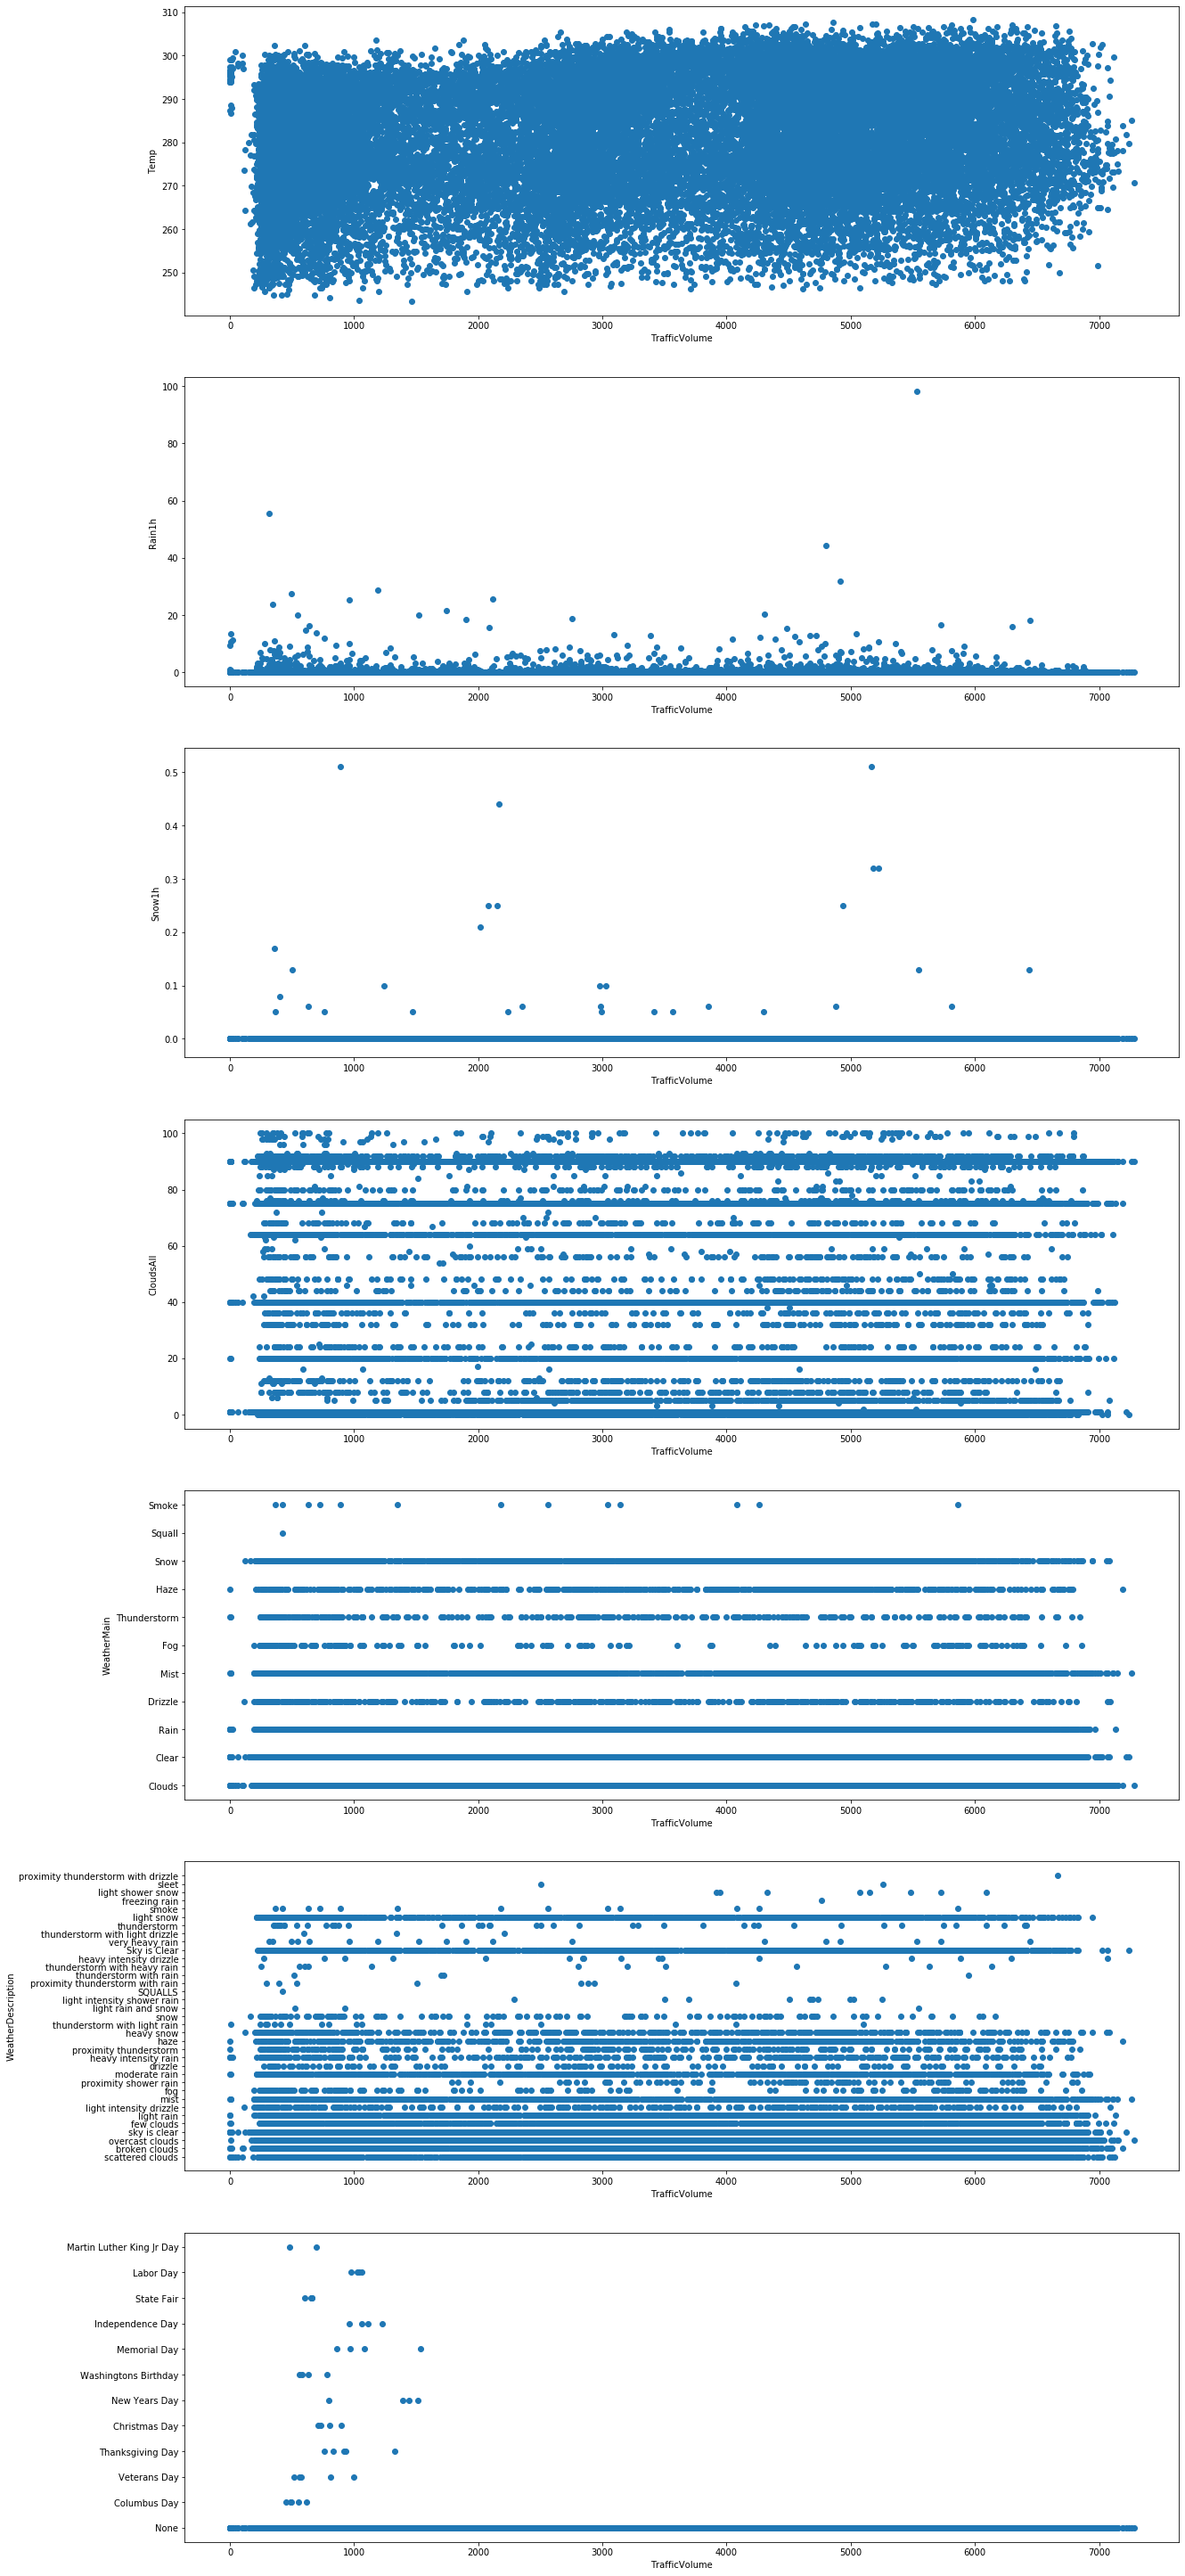

In [41]:
i=0
fig=plt.figure(figsize=(20, 60))
# going through columns 1 to 51 in the data set
for col in data.columns:
    if i>0 and i<7:
        ax = fig.add_subplot(8,1,i+1)
        ax.scatter(y=data[col], x=data["TrafficVolume"])
        plt.ylabel(col)
        plt.xlabel("TrafficVolume")
        i+=1
    else:
        i+=1
ax = fig.add_subplot(8,1,8)
ax.scatter(y=data["IsHoliday"], x=data["TrafficVolume"])
plt.xlabel("TrafficVolume")
plt.show()

In [58]:
#trying the model that includes the new parameters
#we are checking if it still compute correct results with the full model
model1 = smf.ols('TrafficVolume~C(Weekday)*C(Hour)+C(Day)*C(Month)+C(IsHoliday)*C(Year)+C(WeatherDescription)*C(Hour)+C(WeatherMain)*C(Hour)+CloudsAll*C(Hour)+Snow1h*C(Hour)+Rain1h*C(Hour)+Temp*C(Hour)', data = data).fit()
print(model1.summary())
y_pred = model1.predict(data)
print(np.sqrt(metrics.mean_squared_error(data["TrafficVolume"].values, y_pred)))

/Users/coralineduval/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:1294: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse
/Users/coralineduval/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/Users/coralineduval/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/Users/coralineduval/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1892: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


                            OLS Regression Results                            
Dep. Variable:          TrafficVolume   R-squared:                       0.953
Model:                            OLS   Adj. R-squared:                  0.951
Method:                 Least Squares   F-statistic:                     548.6
Date:                Sun, 17 Nov 2019   Prob (F-statistic):               0.00
Time:                        23:17:29   Log-Likelihood:            -2.5322e+05
No. Observations:               33820   AIC:                         5.088e+05
Df Residuals:                   32618   BIC:                         5.190e+05
Df Model:                        1201                                         
Covariance Type:            nonrobust                                         
                                                                                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------

431.94196339660095


In [43]:
#trying a simplified version of the model above
model2 = smf.ols('TrafficVolume~C(Weekday)*C(Hour)+C(Day)*C(Month)+C(IsHoliday)*C(Year)+Snow1h*C(Hour)', data = data).fit()
print(model2.summary())
y_pred = model2.predict(data)
print(np.sqrt(metrics.mean_squared_error(data["TrafficVolume"].values, y_pred)))

/Users/coralineduval/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:1294: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse
/Users/coralineduval/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/Users/coralineduval/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/Users/coralineduval/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1892: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


                            OLS Regression Results                            
Dep. Variable:          TrafficVolume   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.950
Method:                 Least Squares   F-statistic:                     1061.
Date:                Sun, 17 Nov 2019   Prob (F-statistic):               0.00
Time:                        22:54:35   Log-Likelihood:            -2.5403e+05
No. Observations:               33820   AIC:                         5.093e+05
Df Residuals:                   33218   BIC:                         5.143e+05
Df Model:                         601                                         
Covariance Type:            nonrobust                                         
                                                                coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------

442.448147936682


In [44]:
#trying a simplified version of the model above
model2 = smf.ols('TrafficVolume~C(Weekday)*C(Hour)+C(Day)*C(Month)+C(IsHoliday)*C(Year)+Snow1h*C(Hour)', data = data).fit()
print(model2.summary())
y_pred = model2.predict(data)
print(np.sqrt(metrics.mean_squared_error(data["TrafficVolume"].values, y_pred)))

/Users/coralineduval/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:1294: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse
/Users/coralineduval/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/Users/coralineduval/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/Users/coralineduval/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1892: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


                            OLS Regression Results                            
Dep. Variable:          TrafficVolume   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.950
Method:                 Least Squares   F-statistic:                     1061.
Date:                Sun, 17 Nov 2019   Prob (F-statistic):               0.00
Time:                        22:54:47   Log-Likelihood:            -2.5403e+05
No. Observations:               33820   AIC:                         5.093e+05
Df Residuals:                   33218   BIC:                         5.143e+05
Df Model:                         601                                         
Covariance Type:            nonrobust                                         
                                                                coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------

442.448147936682


In [45]:
#trying a simplified version of the model above
model3 = smf.ols('TrafficVolume~C(Weekday)*C(Hour)+C(Day)*C(Month)+C(IsHoliday)*C(Year)+Snow1h*C(Weekday)+Rain1h*C(Weekday)', data = data).fit()
print(model3.summary())
y_pred = model3.predict(data)
print(np.sqrt(metrics.mean_squared_error(data["TrafficVolume"].values, y_pred)))

                            OLS Regression Results                            
Dep. Variable:          TrafficVolume   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.949
Method:                 Least Squares   F-statistic:                     1134.
Date:                Sun, 17 Nov 2019   Prob (F-statistic):               0.00
Time:                        22:54:58   Log-Likelihood:            -2.5424e+05
No. Observations:               33820   AIC:                         5.096e+05
Df Residuals:                   33263   BIC:                         5.143e+05
Df Model:                         556                                         
Covariance Type:            nonrobust                                         
                                                coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------

445.2268746666247


In [47]:
model4 = sm.tsa.SARIMAX(data2, trend='n', order=(1,1,1), seasonal_order=(1,1,1,12)).fit() #trying a period of 12
yhat = model4.predict()
print(model4.summary())

/Users/coralineduval/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                                 Statespace Model Results                                 
Dep. Variable:                      TrafficVolume   No. Observations:                33820
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood             -273048.503
Date:                            Sun, 17 Nov 2019   AIC                         546107.007
Time:                                    23:04:16   BIC                         546149.149
Sample:                                         0   HQIC                        546120.452
                                          - 33820                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1901      0.009     21.733      0.000       0.173       0.207
ma.L1          0.2875      0.008   

In [48]:
print(np.sqrt(metrics.mean_squared_error(data["TrafficVolume"].values, yhat)))

779.6020416476915


In [64]:
#the final model is the same as model1, except IsHoliday is not linked with the year anymore as it raised issues to predict the year 2018 (that is not in the train dataset)
final_model= smf.ols('TrafficVolume~C(Weekday)*C(Hour)+C(Day)*C(Month)+C(IsHoliday)+C(WeatherMain)*C(Hour)+CloudsAll*C(Hour)+Snow1h*C(Hour)+Rain1h*C(Hour)+Temp*C(Hour)', data = data).fit()
print(final_model.summary())
y_pred = final_model.predict(data)
print(np.sqrt(metrics.mean_squared_error(data["TrafficVolume"].values, y_pred)))
#the r2 and rmse is similar from model1

                            OLS Regression Results                            
Dep. Variable:          TrafficVolume   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.950
Method:                 Least Squares   F-statistic:                     772.2
Date:                Sun, 17 Nov 2019   Prob (F-statistic):               0.00
Time:                        23:22:27   Log-Likelihood:            -2.5376e+05
No. Observations:               33820   AIC:                         5.092e+05
Df Residuals:                   32985   BIC:                         5.162e+05
Df Model:                         834                                         
Covariance Type:            nonrobust                                         
                                                   coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------

438.97365834957213


In [59]:
# read data into a DataFrame
data_test = pd.read_csv('/Users/coralineduval/Documents/Ecole/M1-IMT:Singap/Semestre 1/IE5202/Project 2/P2test.csv')
test_index=pd.read_csv('/Users/coralineduval/Documents/Ecole/M1-IMT:Singap/Semestre 1/IE5202/Project 2/P2test_index.csv')

In [60]:
#to interpret the data, we will convert Time into a date format
data_test["Time"]=pd.to_datetime(data_test["Time"], format="%Y-%m-%d %H:%M:%S")

#New column that indicates the day of the week corresponding to the time
data_test["Weekday"]=data_test["Time"].dt.day_name()

#creating new varibles for the year, month, day, hour to access information quicker:
data_test["Year"]=data_test["Time"].dt.year
data_test["Month"]=data_test["Time"].dt.month
data_test["Day"]=data_test["Time"].dt.day
data_test["Hour"]=data_test["Time"].dt.hour

In [61]:
test_index.head()

Index
0    203
1    238
2    250
3    283
4    298

In [62]:
data_test.loc[202,"TrafficVolume"]
#as such we will need to think about shifting all the values in the test_index

0

In [65]:
#to make sure we just just the previous rows data to make the forecast, 
#i will include the new forecasted value instead of the 0 value while we run the forecast
copy_test=data_test.copy()
predictions_alone = []
i=0
for i in range (test_index.shape[0]):
    index_value=test_index.iloc[i,0]
    y_pred = final_model.predict(copy_test[0:index_value])
    #replacing the 0 value in the test dataset by th predicted value to predict the next values
    copy_test.iloc[index_value-1,8]=y_pred[index_value-1]
    #saving the predicted value to put it in the csv file later
    predictions_alone.append(y_pred[index_value-1])

pred_alone=pd.DataFrame({'A0209907X':predictions_alone })
pred_alone.to_csv('/Users/coralineduval/Desktop/predictions_of_index_alone.csv', index=False)
copy_test.to_csv('/Users/coralineduval/Desktop/predictions_all_values.csv',header='A0209907X', index=False)